[**Demo %s**](#demo-stability-equispaced)

We choose a function over the interval $[0,1]$.

In [2]:
f(x) = sin(exp(2x));

Here is a graph of $f$ and its polynomial interpolant using seven equally spaced nodes.

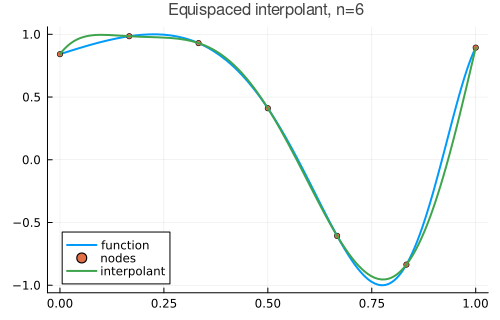

In [3]:
plot(f, 0, 1, label="function", legend=:bottomleft)
t = range(0, 1, 7)    # 7 equally spaced nodes
y = f.(t)
scatter!(t, y, label="nodes")

p = FNC.polyinterp(t, y)
plot!(p, 0, 1, label="interpolant", title="Equispaced interpolant, n=6")

This looks pretty good. We want to track the behavior of the error as $n$ increases. We will estimate the error in the continuous interpolant by sampling it at a large number of points and taking the max-norm.

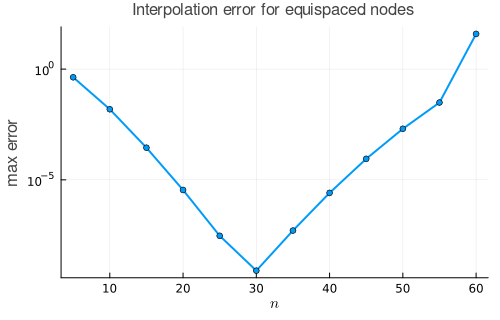

In [4]:
n = 5:5:60
err = zeros(size(n))
x = range(0, 1, 2001)             # for measuring error
for (k, n) in enumerate(n)
    t = range(0, 1, n+1)          # equally spaced nodes
    y = f.(t)                     # interpolation data
    p = FNC.polyinterp(t, y)
    err[k] = norm((@. f(x) - p(x)), Inf)
end
plot(n, err, m=:o, 
    xaxis=(L"n"), yaxis=(:log10, "max error"),
    title="Interpolation error for equispaced nodes")

The error initially decreases as one would expect but then begins to grow. Both phases occur at rates that are exponential in $n$, i.e., $O(K^n$) for a constant $K$, appearing linear on a semi-log plot.